In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("Dataset/iris.csv")
data.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
print(data.count())
print(data.shape)


sepal.length    150
sepal.width     150
petal.length    150
petal.width     150
variety         150
dtype: int64
(150, 5)


In [5]:
print(data.columns)
print(data['variety'].value_counts())

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64


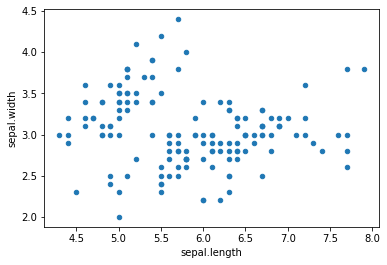

In [6]:
data.plot(kind="scatter", x="sepal.length", y="sepal.width")
plt.show()

C:\Users\zubair\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


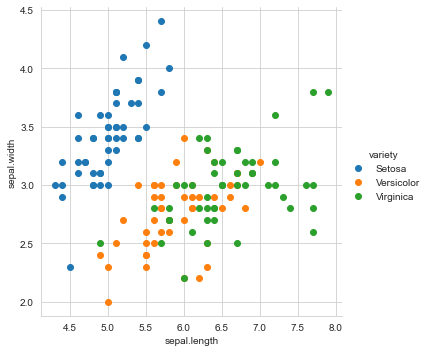

In [7]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="variety", size=5).map(plt.scatter, "sepal.length", "sepal.width").add_legend()
plt.show()

# Observations
up to this what i observed<br>
1 - using the sepal.width and sepal.length we can easily distinguish the setosa flower only. <br>
2 - but the versicolor and virginica will be hard to classify in this feature selections.

C:\Users\zubair\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


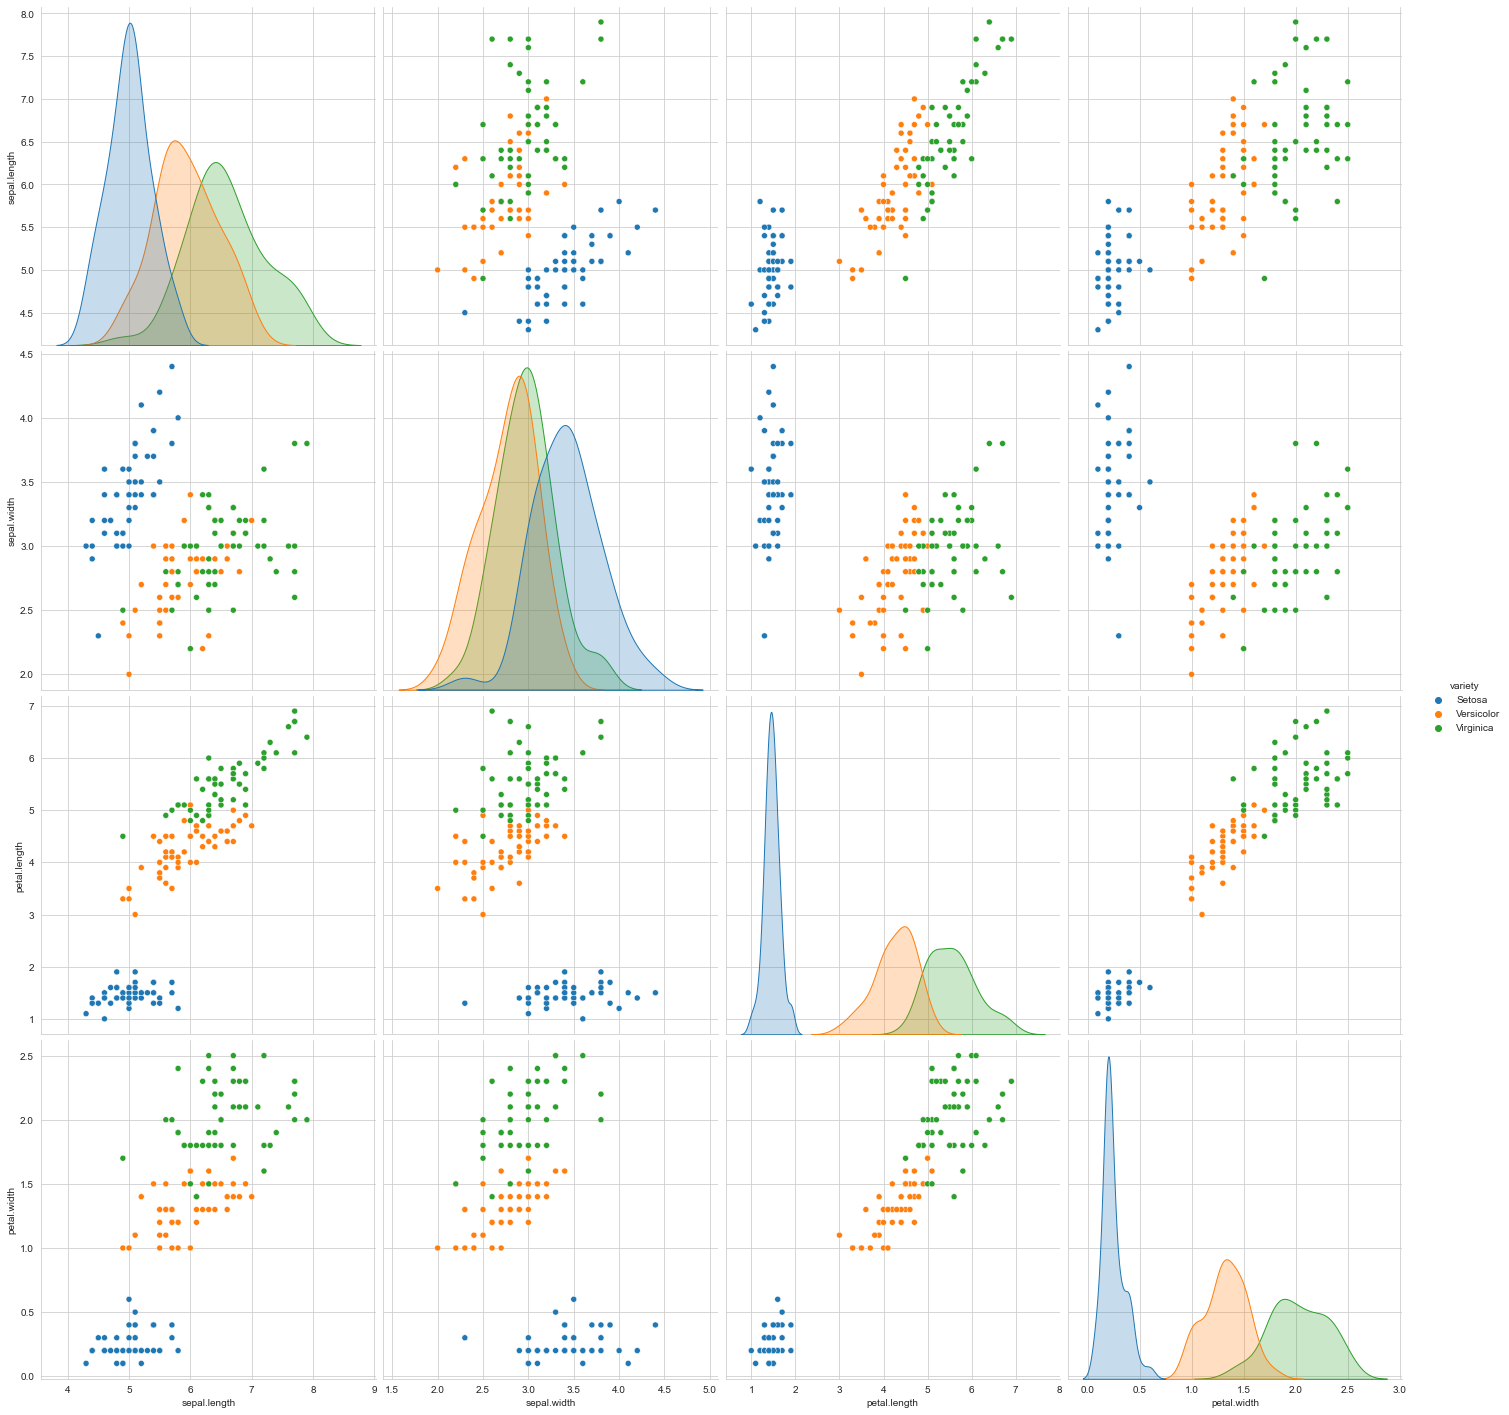

In [8]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="variety", size=5)
plt.show()

# Observations
so by taking down our all features using pair plot i found the following observations<br>
1 - by using petal.length and petal.width or vice versa features  we can seperate our setosa flowers easy.<br>
2 - we can also seperat our other two flowers but they have some overlaps but given features in 1 is more fine then sp.w and sp.len.

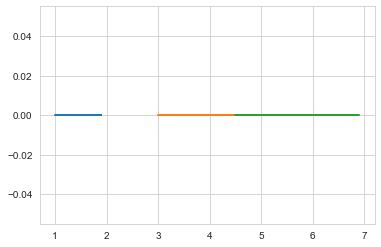

In [9]:
iris_setosa = data.loc[data["variety"] == "Setosa"]
iris_virginica = data.loc[data["variety"] == "Virginica"]
iris_versicolor = data.loc[data["variety"] == "Versicolor"]

plt.plot(iris_setosa["petal.length"], np.zeros_like(iris_setosa['petal.length']))
plt.plot(iris_versicolor["petal.length"], np.zeros_like(iris_versicolor['petal.length']))
plt.plot(iris_virginica["petal.length"], np.zeros_like(iris_virginica['petal.length']))

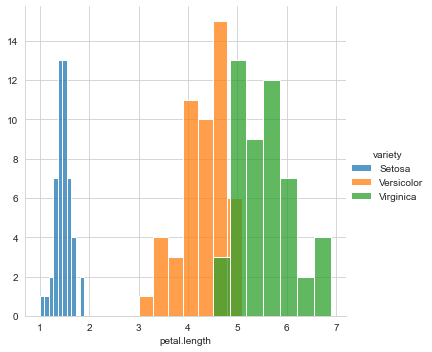

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="variety", height=5).map(sns.histplot, "petal.length").add_legend()
plt.show()

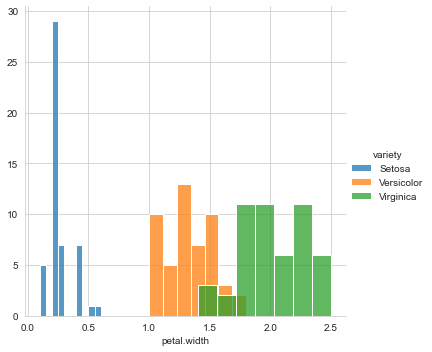

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="variety", height=5).map(sns.histplot, "petal.width").add_legend()
plt.show()

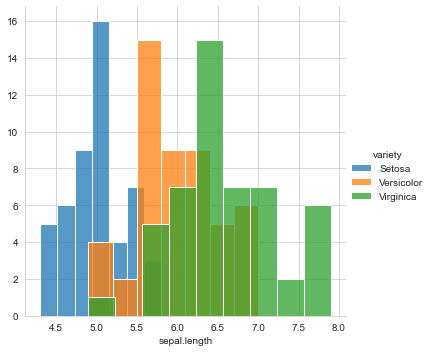

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="variety", height=5).map(sns.histplot, "sepal.length").add_legend()
plt.show()

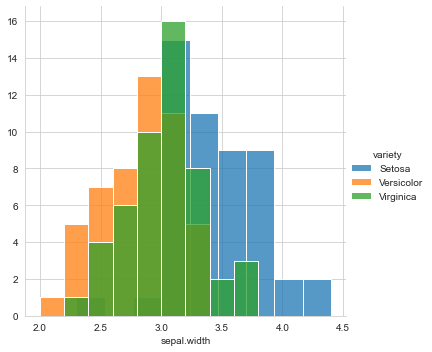

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="variety", height=5).map(sns.histplot, "sepal.width").add_legend()
plt.show()

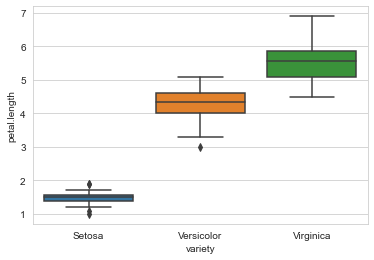

In [14]:
sns.boxplot(x="variety", y='petal.length', data=data)
plt.show()

In [15]:
print(data.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Split our train and test data, plus preparing our data for modeling

In [16]:
train, test = train_test_split(data, test_size=0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [17]:
x_train = train.drop(columns=["variety"]).values
y_train = train["variety"].values


# Manually Feature prediction base on our observition of the distribution plots

In [18]:
def featureSelection(petal_length):
    if petal_length <= 2.5:
        return "Setosa"
    elif petal_length < 4.8:
        return "Versicolor"
    else:
        return "Virginica"

In [19]:
manuel_prediction = np.array([featureSelection(i) for i in x_train[:, 2]])
manuel_prediction
    

array(['Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica',
       'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Setosa',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Virginica',
       'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor',
       'Versicolor', 'V

In [20]:
print(manuel_prediction == y_train)
np.mean(manuel_prediction == y_train)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
 False  True  True  True]


0.9553571428571429

In [29]:
X = data.iloc[:, 0: 4].values
y = data.iloc[:, 4].values

In [30]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y
# Iris-setosa == 0
# Iris-versicolor == 1
# Iris-virginica == 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Logistic Regression

In [35]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


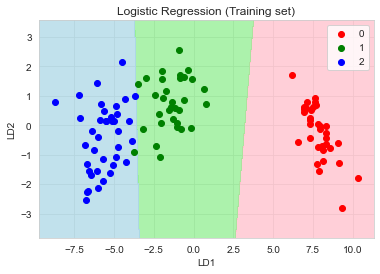

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


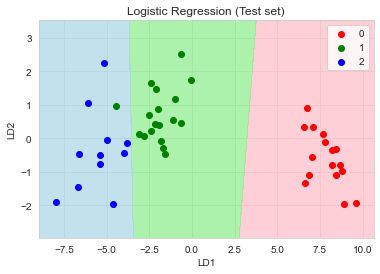

In [39]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Naive Bayes


In [40]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [42]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [43]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes is:  0.9777777777777777


In [44]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


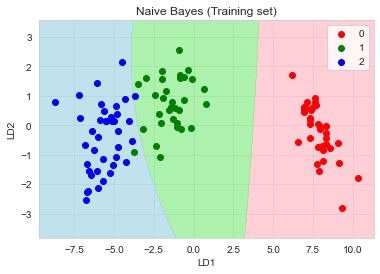

In [45]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


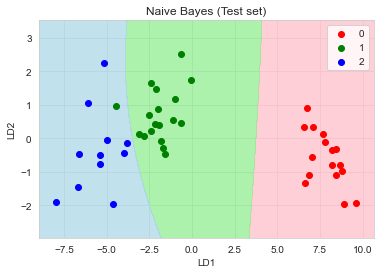

In [46]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Observations
#### 1 The accuracy of Logistic Regression is: 84 %
#### 2 The accuracy of Naive Bayes is: 97 %
